# Continuous Auditing with Python

With the pace of business moving faster and faster, the risks organizations face are constant. Organizations can no longer simply review and measure the relevant controls that mitigate their risks at a set periodic timeframe such as quarterly or annually, but must be able to review, understand and mitigate their risks on a continuous basis. That’s where continuous auditing techniques come into play and are becoming more and more critical in a well-functioning organization. 

This notebook is the first of a series of notebooks that goes into practical continuous auditing techniques that organizations can use to address their risks in common areas in finance, IT and operations using open source tools (i.e., free tools) such as Python.

### Use Case - City of Chicago: Black Garbage Carts Ordering and Fulfillment Process

**Background:**

If you live in Chicago like me, you’re familiar with the 96-gallon black garbage carts you use to dump your trash in. Every now and then you may need a new cart because it happens to mysteriously disappear or needs to be replaced because of all the wear and tear it receives over the years. Fortunately, requesting a replacement cart is easy; you call the City’s 311 center and simply request a new one. Several days later, a new cart is delivered to your address by a sanitation worker and you’re able to go back to life as normal. 

**The Problem:**

Let’s say that you work as an Internal Audit consultant and the City of Chicago has contacted your firm to help them with a problem. It appears that some city residents are complaining that the black garbage carts they’ve requested haven’t arrived even though they’ve received notice from the City that their carts have been properly delivered.Furthermore, some residents have complained that its taken sometimes weeks or even months to get a new  The City wants your firm to design and implement a continuous audit of its black garbage cart ordering and fulfillment process with the following objective:

- Determine the effectiveness of the City’s black garbage cart ordering and fulfillment process to ensure optimal customer satisfaction within management's risk tolerance level.

Understanding that the costs of obtaining 100% customer satisfaction may be too high and/or unrealistic, the City has determined that it is willing to tolerate a certain level of risk below 100%. However, management has not been able to determine its acceptable risk tolerance level.  

In addition, management has determined that two main factors or attributes directly affect this program's customer satisfaction score, which are 1) final delivery of black garbage carts and 2) delivery time (measured in days). Management needs to determine an appropriate delivery rate and delivery time that is both practical based on geographic and workforce limitations. 

### Continuous Auditing: Approach and Execution

The approach of continuously auditing the City’s ordering and fulfillment process is no different than a regular audit. A detailed understanding of the City’s black garbage cart ordering and fulfillment process must be obtained in order to identify its key risks and critical internal controls. This can be done through several different methods and the methods chosen are highly dependent on the level and types of documentation that already exist related to the City’s processes.

For example, if an internal audit had been previously conducted, ample workpaper documentation should be available for Internal Auditors to review along with prior policies and procedures and process flowcharts and narratives describing the City’s processes, risks and controls. If this is a brand new audit, the Internal Auditor will have to organically generate the required detailed understanding through multiple rounds of walkthroughs with key audit clients and stakeholders who are either process owners or know the processes extremely well. If this is the case, only highly experienced Internal Auditors should be entrusted with leading and even documenting these walkthroughs.

Once a detailed understanding is obtained, process flow charts and process narratives should be used to document the process’ key risks and critical controls. I recommend using the SIPOC method which consists of the following: 

- S: Suppliers
- I: Inputs
- P: Processes
- O: Outputs
- C: Customers

The swim lane chart below outlines the City’s black garbage cart ordering and fulfillment process using the SIPOC method. 

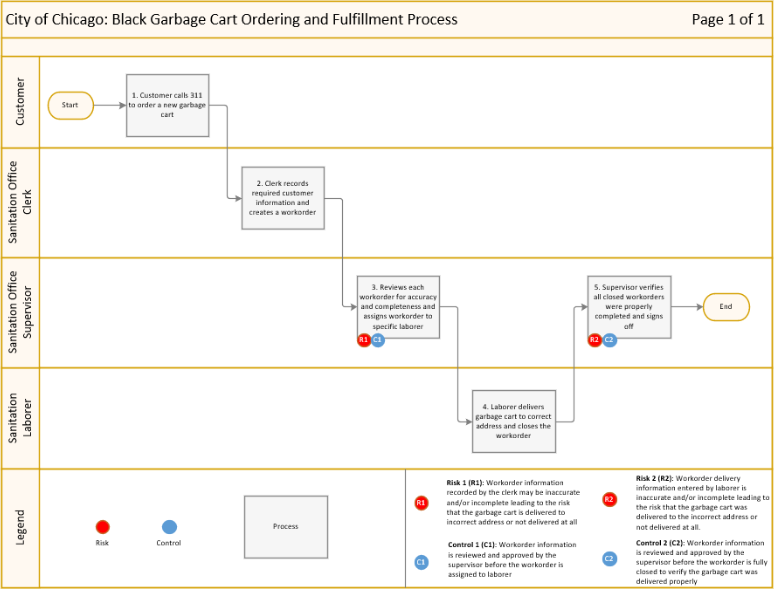

As you can see from the process flow chart, there are two key risks and two critical controls that were identified in the City’s garbage bin process. For purposes of conducting a continuous audit, only control 2, verification that the garbage bin has actually been delivered, will be selected for testing and garbage bin delivery times will be used to help assess risk tolerance as well as potential recommendations for process improvement. 

## Python Script

In [1]:
import pandas as pd
pd.set_option('display.precision', 16)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.cluster import DBSCAN
import utils
%load_ext autoreload
%autoreload 2

In [2]:
def modify_garbage_values(_df:pd.DataFrame) -> pd.DataFrame: 
    """
    changes the data types of each column
    """
    
    col_kept = [
        'creation_date', 'status', 'service_request_number',
        'type_of_service_request', 'street_address', 'zip_code', 
        'x_coordinate', 'y_coordinate', 'ward', 'police_district',
        'community_area', 'latitude', 'longitude', 'ssa',
        'completion_date', 'number_of_black_carts_delivered',
        'current_activity', 'most_recent_action'
               ]
    
    return (_df
            .astype({'creation_date':'datetime64[ns]', 
                     'completion_date':'datetime64[ns]',
                     'number_of_black_carts_delivered':'float64', 
                     'latitude':'float64', 
                     'longitude':'float64'
                    })
            [col_kept]
            )    

### Importing City of Chicago Black Garbage Bin Data

Import the data using City of Chicago's API -> https://data.cityofchicago.org/resource/9ksk-na4q.json

In [3]:
# create a GetBinData object
gb_data = utils.GetBinData(300000)

In [4]:
# method imports data using a cached property
gb = modify_garbage_values(gb_data.dataset)
gb.head()

,creation_date,status,service_request_number,type_of_service_request,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,ssa,completion_date,number_of_black_carts_delivered,current_activity,most_recent_action
0,2018-12-19,Open,18-03389834,Garbage Cart Black Maintenance/Replacement,1825 W 23RD ST,60608,1164560.99999945,1888884.37000377,25,10,31,41.8505952446961871,-87.6719629134502725,NaN,NaT,NaN,NaN,NaN
1,2018-12-18,Open,18-03388588,Garbage Cart Black Maintenance/Replacement,4231 N AUSTIN AVE,60634,1135591.94588307,1927511.76801956,38,16,15,41.9576459880629073,-87.7767842469783943,NaN,NaT,NaN,NaN,NaN
2,2018-12-18,Open,18-03387639,Garbage Cart Black Maintenance/Replacement,4359 S OAKENWALD AVE,60653,1185055.9122006,1876342.56020238,4,2,39,41.8155318284248594,-87.5962813743142448,NaN,NaT,NaN,NaN,NaN
3,2018-12-18,Open,18-03388531,Garbage Cart Black Maintenance/Replacement,5713 W GIDDINGS ST,60630,1137391.82498949,1931007.54390241,45,16,15,41.9667212145756707,-87.7704713724801451,NaN,NaT,NaN,NaN,NaN
4,2018-12-18,Open,18-03388274,Garbage Cart Black Maintenance/Replacement,7221 S ARTESIAN AVE,60629,1161291.96168726,1856701.62931588,18,8,66,41.7621995613739614,-87.6842494571493347,14,NaT,NaN,NaN,NaN


### Understanding our Data

In order to understand our dataset, we have to run a few exploratory analysis recipes. Most will include aggregations and visualizations. In addition, data cleaning efforts are needed to ensure typos from manual entries and/or system glitches are properly addressed. 

For example, the number of garbage bins delivered is not correct for some completed workorders. 

In [5]:
# review our data so we understand it in more detail
# the start and end dates of the data
print(gb.creation_date.max())
print(gb.creation_date.min())

2018-12-19 00:00:00
2012-12-10 00:00:00


In [6]:
# review the max and min numbers of black garbage bins delivered. 
print(gb.number_of_black_carts_delivered.max())
print(gb.number_of_black_carts_delivered.min())

2150009386.0
0.0


In [7]:
gb.number_of_black_carts_delivered.sort_values(ascending=False).head(500)

216949    2150009386.0
129581     160033432.0
138235     160030192.0
148194     160020002.0
181057     150023885.0
              ...     
146929             4.0
52648              4.0
69725              4.0
265299             4.0
24174              4.0
Name: number_of_black_carts_delivered, Length: 500, dtype: float64

In [8]:
gb.number_of_black_carts_delivered.value_counts().sample(20)

number_of_black_carts_delivered
1101.0          1
130038173.0     1
130033936.0     1
150002644.0     1
25.0            3
130035571.0     1
14.0            2
13.0            3
150018402.0     1
150022621.0     1
150015732.0     1
130030083.0     1
140018171.0     1
24.0            1
9.0             3
130035493.0     1
160020002.0     1
130034077.0     1
31.0            2
27.0           11
Name: count, dtype: int64

In [9]:
# based on our analysis above, it appears that 6 garbage bins is most likely the maximum amount of bins that can delivered for one workorder
# thus, let's modify our data to modify the other completed workorders so they only reflect 1 bin delivered
gb_mod = (gb
          .assign(mod_delivered_carts = lambda df: np.where(df.number_of_black_carts_delivered > 6, 1, df.number_of_black_carts_delivered)
                 )
         )

gb_mod.mod_delivered_carts.value_counts()

mod_delivered_carts
1.0    116594
0.0     76683
2.0     44129
3.0      4596
4.0       724
5.0        45
6.0        25
0.2         1
Name: count, dtype: int64

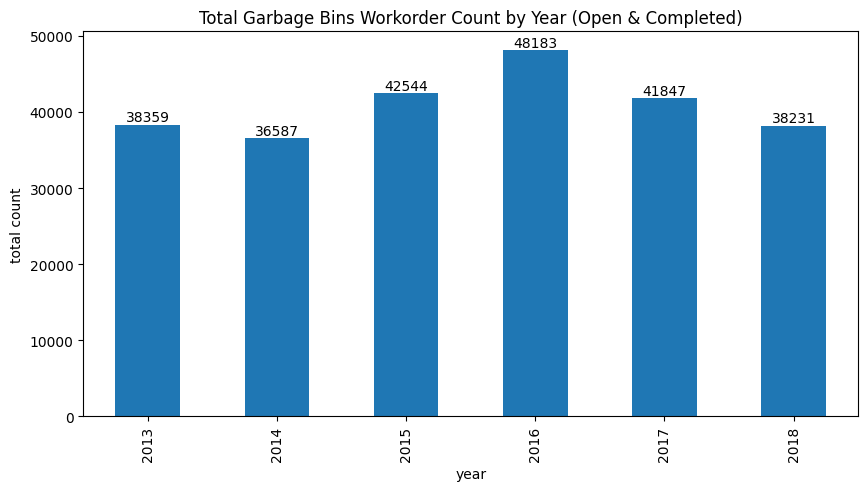

In [10]:
# find out the number of bins, both open and closed status by year
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5))
_ = (gb_mod
     .assign(year_only = lambda _df: _df.creation_date.dt.year)
     [['year_only', 'status', 'service_request_number']]
     .query('(status == "Open") or (status == "Completed")')
     .groupby(['year_only'])
     .agg(total_count = ('status', 'count'))
     .iloc[1:, :]
     .plot.bar(ax=ax, xlabel='year', ylabel='total count', legend=False, 
               title='Total Garbage Bins Workorder Count by Year (Open & Completed)')
    )

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

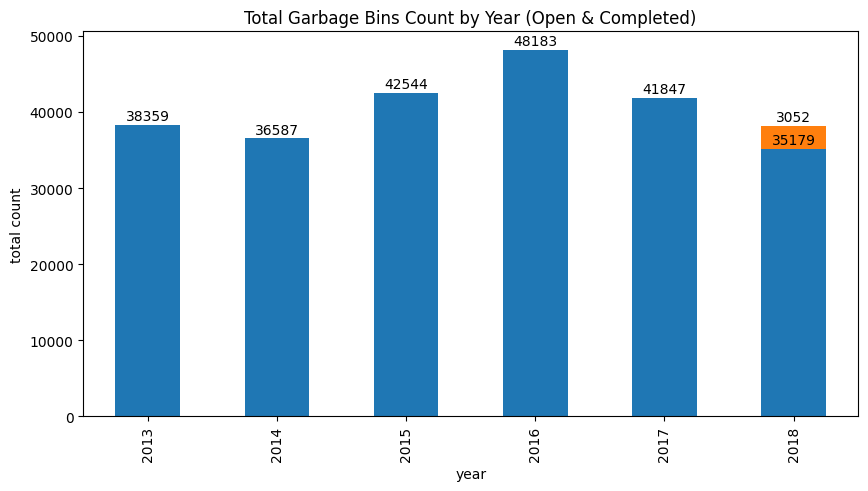

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

(gb_mod
 .assign(year_only = lambda _df: _df.creation_date.dt.year, 
         completed_only = lambda _df: np.where(_df.status == 'Completed', 1, 0), 
         open_only = lambda _df: np.where(_df.status == 'Open', 1, 0)
        )
 [['year_only', 'status', 'completed_only', 'open_only']]
 .query('(status == "Open") or (status == "Completed")')
 .groupby(['year_only'])
 .agg(completed_count = ('completed_only', 'sum'), 
      open_only = ('open_only', 'sum')
     )
 .iloc[1:, :]
 .plot.bar(ax=ax, xlabel='year', ylabel='total count', stacked=True, legend=False, 
               title='Total Garbage Bins Count by Year (Open & Completed)')
)

cumulative_heights = dict()
for p in ax.patches:
    # The x-coordinate of the bar (year), used to identify each stack
    x_coord = p.get_x()
    height = p.get_height()
    
    # Only proceed if height is greater than 0
    if height > 0:
        # Convert height to an integer
        height_as_int = int(height)

        # If the bar is not in the dictionary, initialize its height; else, add the current height
        if x_coord not in cumulative_heights:
            cumulative_heights[x_coord] = height
        else:
            cumulative_heights[x_coord] += height
        
        # Annotate using the cumulative height for the current stack, displaying the height as an integer
        ax.annotate(f"{height_as_int}", 
                    (p.get_x() + p.get_width() / 2, cumulative_heights[x_coord]), 
                    ha='center', va='bottom', 
                    xytext=(0, 1), 
                    textcoords='offset points')

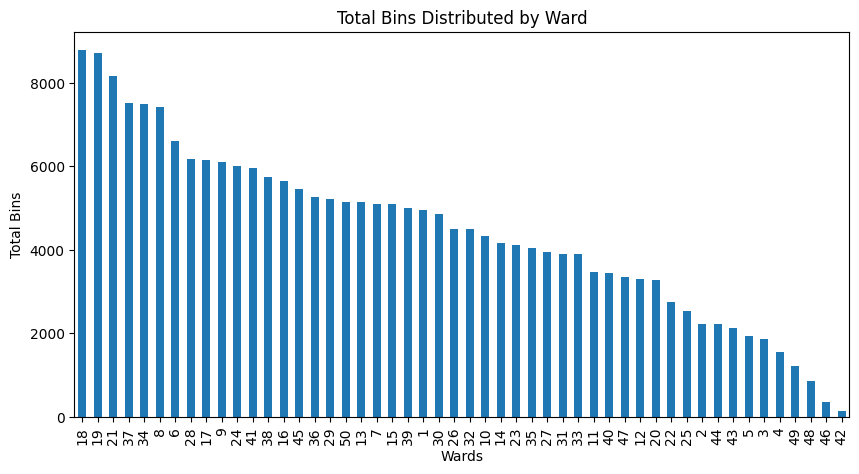

In [12]:
# pd.set_option('display.float_format', lambda x: '%.0f' % x)
fig, ax = plt.subplots(figsize=(10, 5))

_ = (gb_mod
     .query('(status == "Completed")')
     .groupby(['ward'])
     .agg(total_distributed = ('mod_delivered_carts', 'sum'))
     .sort_values('total_distributed', ascending=False)
     .plot
     .bar(ax=ax, xlabel='Wards', ylabel='Total Bins', title='Total Bins Distributed by Ward', legend=False)
    )

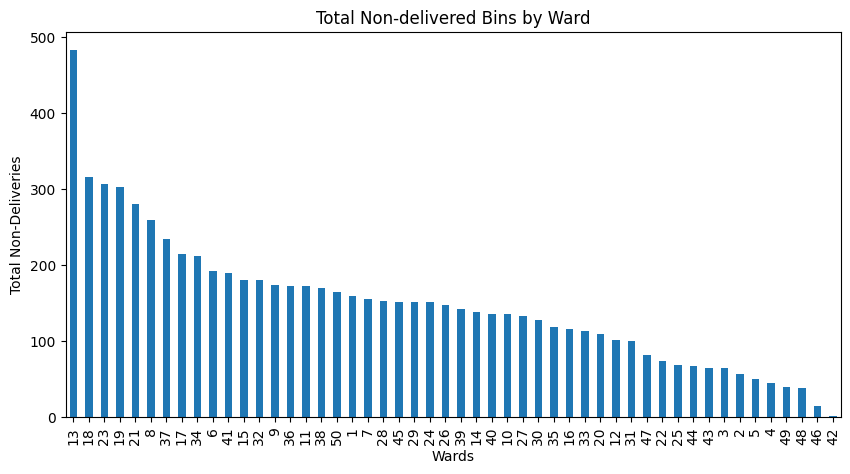

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = (gb_mod
     .query('(status == "Completed") & (most_recent_action == "Cart Approved - Delivered") & (number_of_black_carts_delivered == 0)')
     .ward
     .value_counts()
     .plot
     .bar(ax=ax, xlabel='Wards', ylabel='Total Non-Deliveries', title='Total Non-delivered Bins by Ward')
)

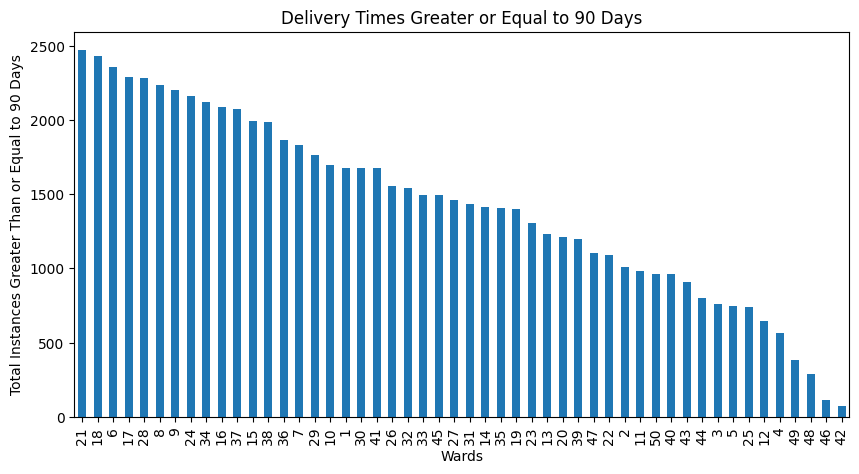

In [14]:
gb_copy = gb_mod.copy()

gb_copy = (gb_copy
           .query('status == "Completed"')
          .assign(completion_time = lambda df: (df.completion_date - df.creation_date).dt.days)
          )

fig, ax = plt.subplots(figsize=(10, 5))

_ = (gb_copy
     .query('completion_time >= 90')
     .ward
     .value_counts()
     .plot
     .bar(ax=ax, xlabel='Wards', ylabel='Total Instances Greater Than or Equal to 90 Days', title='Delivery Times Greater or Equal to 90 Days')
    )

Text(50, 71.73071509239406, ' Average Overall Time is 71.73 days')

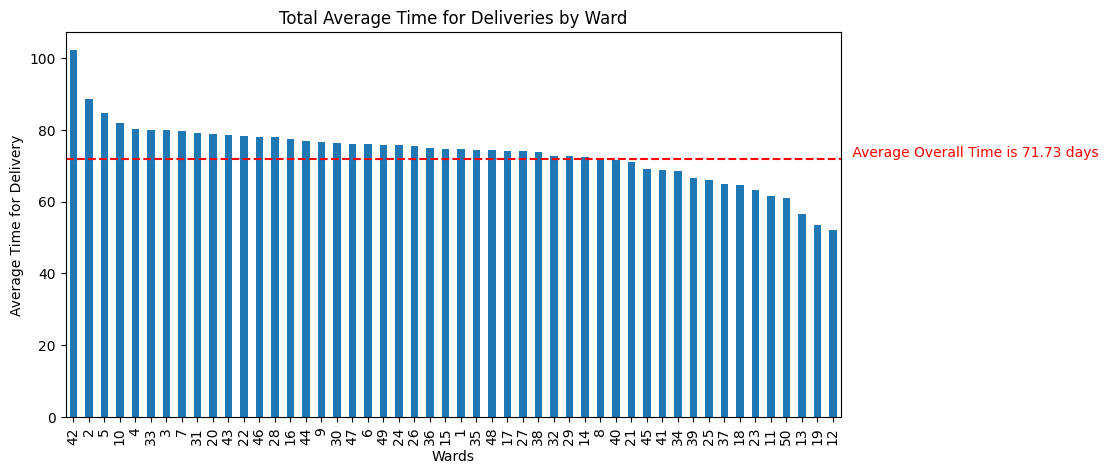

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = (gb_copy
     .groupby(['ward'])
     .agg(average_time = ('completion_time', 'mean')
         )
     .sort_values('average_time', ascending=False)
     .plot
     .bar(ax=ax, xlabel='Wards', ylabel='Average Time for Delivery', legend=False, title='Total Average Time for Deliveries by Ward')
    )

average_time = gb_copy.completion_time.mean()

# Draw a horizontal dotted line at the height of the average
ax.axhline(y=average_time, color='r', linestyle='--', label='Average Overall Time')

# Optionally, add a text label for the average line
ax.text(x=50, y=average_time, s=f' Average Overall Time is {average_time:.2f} days', color='r', verticalalignment='bottom')

## Chicago Ward Map in 2022

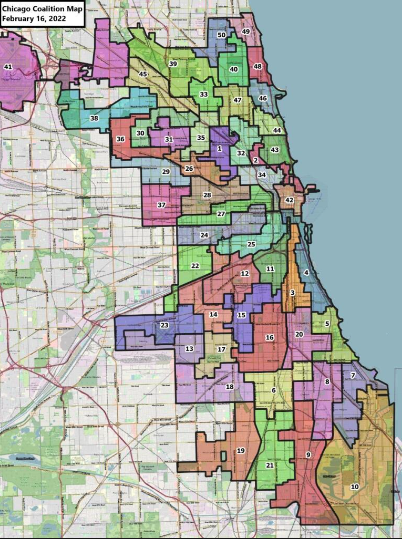

Text(0, 0.5, 'Latitude')

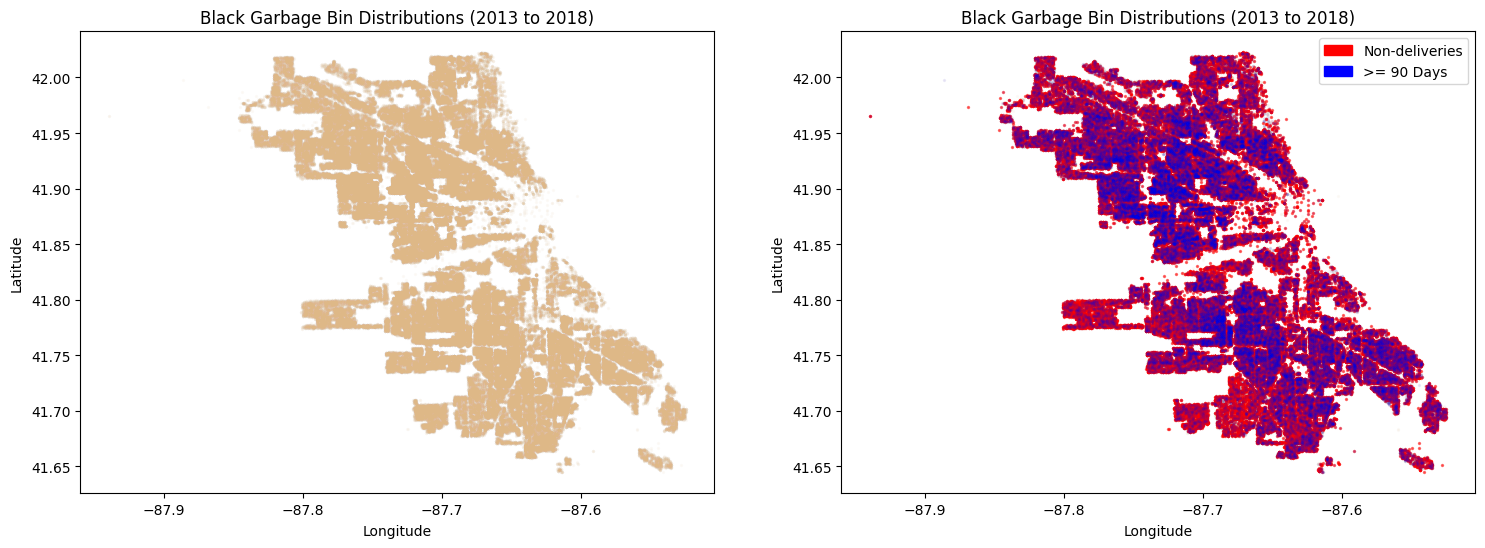

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].scatter(gb_copy.longitude, gb_copy.latitude, color='burlywood', alpha=0.05, s=2)
axes[0].title.set_text('Black Garbage Bin Distributions (2013 to 2018)')
axes[0].set_xlabel('Longitude', labelpad=5)
axes[0].set_ylabel('Latitude', labelpad=5)

axes[1].scatter(gb_copy.longitude, gb_copy.latitude, color='burlywood', alpha=0.05, s=2)
axes[1].scatter(gb_copy.query('number_of_black_carts_delivered == 0').longitude, gb_copy.query('number_of_black_carts_delivered == 0').latitude, color='red', alpha=0.5, s=2)
axes[1].scatter(gb_copy.query('completion_time > 90').longitude, gb_copy.query('completion_time > 90').latitude, color='blue', alpha=0.05, s=2)

red_patch = mpatches.Patch(label='Non-deliveries', color='red')
blue_patch = mpatches.Patch(label='>= 90 Days', color='blue')
axes[1].legend([red_patch, blue_patch], ('Non-deliveries', '>= 90 Days'), 
              loc='upper right', prop={'size':10})
axes[1].title.set_text('Black Garbage Bin Distributions (2013 to 2018)')
axes[1].set_xlabel('Longitude', labelpad=5)
axes[1].set_ylabel('Latitude', labelpad=5)

                    latitude            longitude  mod_delivered_carts  \
Cluster                                                                  
0        41.8391936172537413 -87.6928489173937464   0.9237609133646743   
1        41.8447404636040119 -87.6871670403872656   0.9118813477349670   
2        41.8426691707088310 -87.6904791084011492   0.9314091038137599   
3        41.8431424463803054 -87.6890344044518883   0.8350999008077087   
4        41.8392349580939111 -87.6914501016938033   0.9288773871140460   

              completion_time  
Cluster                        
0         16.0034324942791777  
1        187.6483844082574706  
2         79.5570735924227677  
3        123.9126802270243530  
4         48.2726531913762855  


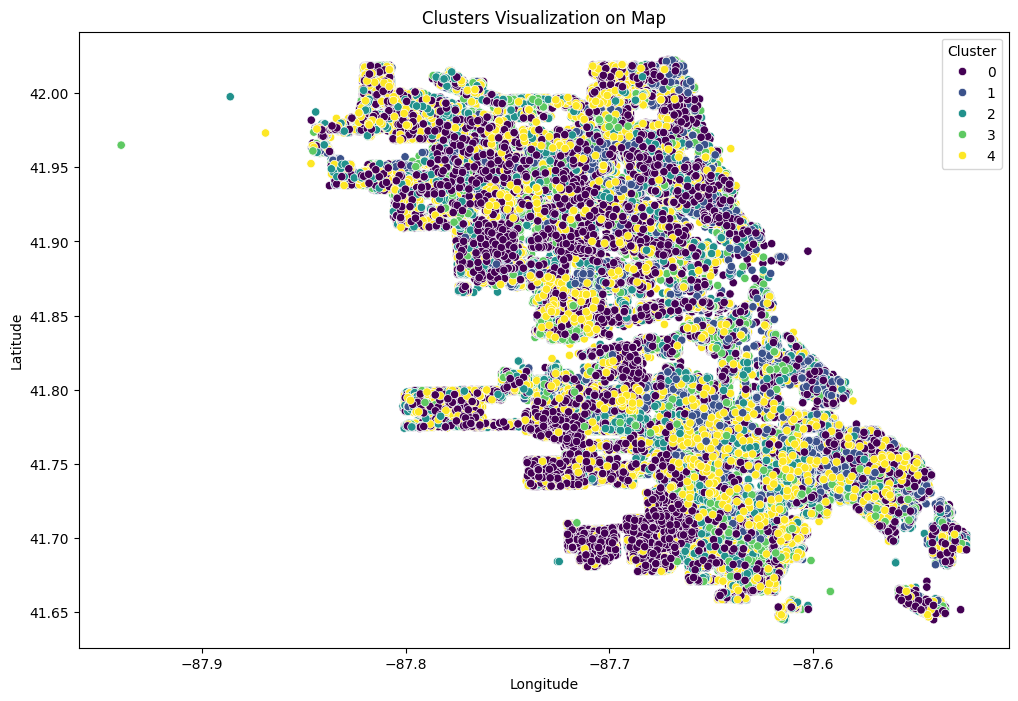

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = gb_copy

# Selecting the relevant features and handling missing values
features = data[['latitude', 'longitude', 'mod_delivered_carts', 'completion_time']]
features_filled = features.fillna(features.mean())

# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_filled)

# Adding the cluster labels to the dataframe
data['Cluster'] = cluster_labels

# Analyzing the characteristics of each cluster
cluster_means = data.groupby('Cluster')[['latitude', 'longitude', 'mod_delivered_carts', 'completion_time']].mean()

# Visualization of clusters on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='Cluster', palette='viridis')
plt.title('Clusters Visualization on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')

# Displaying the cluster characteristics
print(cluster_means)
plt.show()

In [18]:
data.Cluster.value_counts()

Cluster
0    75164
4    56449
2    53212
1    31196
3    28367
Name: count, dtype: int64

In [47]:
cluster4_0 = (gb_copy
 .query('(Cluster == 4) & (mod_delivered_carts == 0)')
 .status
 .count()
)

cluster4 = (gb_copy
 .query('(Cluster == 4)')
 .status
 .count()
)

print(f'{cluster4_0 / cluster4:.4f}')

0.3051


In [48]:
total_0 = (gb_copy
 .query('(mod_delivered_carts == 0) & (status == "Completed")'
       )
 .status
 .count()
)

print(f'{total_0 / len(gb_copy):.4f}')

0.3128


In [50]:
cluster4_above = (gb_copy
 .query('(Cluster == 4) & (completion_time > 48.2726531913762855)')
 .status
 .count()
)

cluster4_all = (gb_copy
 .query('(Cluster == 4)')
 .status
 .count()
)

print(f'{cluster4_above / cluster4_all:.4f}')

0.5067


In [51]:
above_tolerance = (gb_copy
 .query('(completion_time > 48.2726531913762855) & (status == "Completed")')
                  )
print(f'{len(above_tolerance) / len(gb_copy):.4f}')

0.5785
